<a href="https://colab.research.google.com/github/VikrantVDeo/Vibration-Analysis/blob/main/Room_Vibration_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
room_files = {
    "Room113": "Room113_MergedVibrationData.csv",
    "Room167": "Room167_MergedVibrationData.csv",
    "Room173": "Room173_MergedVibrationData.csv",
    "Room175": "Room175_MergedVibrationData.csv",
    "Room180": "Room180_MergedVibrationData.csv",
    "Room183": "Room183_MergedVibrationData.csv"
}

room_means = {}


In [6]:
for room, file_path in room_files.items():
    df = pd.read_csv(f"/content/{file_path}")
    if "Hz" in df.columns:
        df = df.drop(columns=["Hz"])
    room_means[room] = df.mean().mean()  # average

mean_df = pd.DataFrame(list(room_means.items()), columns=["Room", "Mean Vibration (in/s)"])
mean_df.sort_values("Room", inplace=True)


In [8]:
mean_df

,Room,Mean Vibration (in/s)
0,Room113,3.751549e-08
1,Room167,4.001690e-08
2,Room173,3.087159e-08
3,Room175,3.618913e-08
4,Room180,1.706085e-08
5,Room183,1.574871e-08


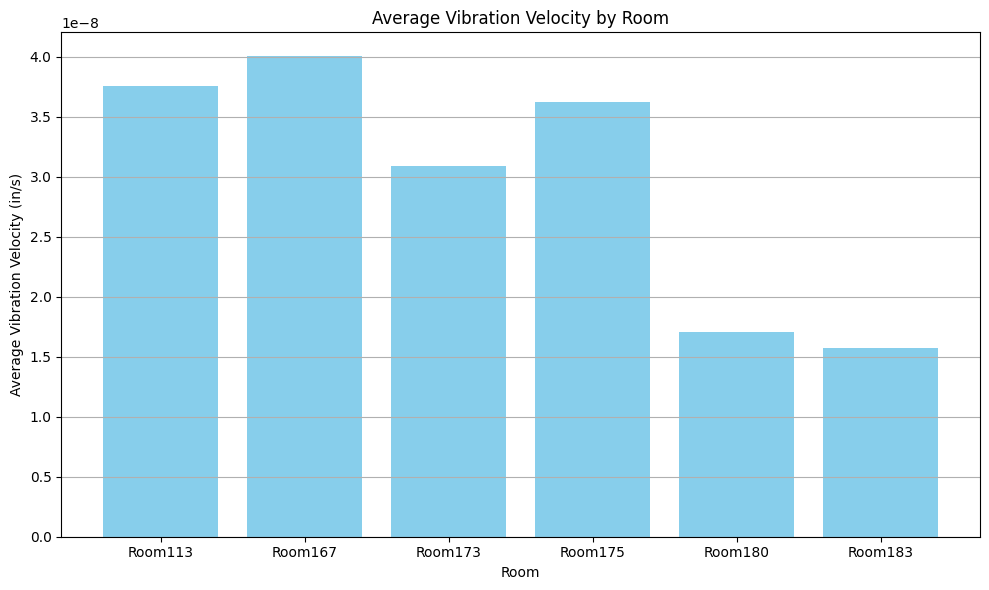

      Room  Mean Vibration (in/s)
0  Room113           3.751549e-08
1  Room167           4.001690e-08
2  Room173           3.087159e-08
3  Room175           3.618913e-08
4  Room180           1.706085e-08
5  Room183           1.574871e-08


In [7]:
# bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_df["Room"], mean_df["Mean Vibration (in/s)"], color='skyblue')
plt.xlabel("Room")
plt.ylabel("Average Vibration Velocity (in/s)")
plt.title("Average Vibration Velocity by Room")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(mean_df)